# Regresión lineal con variables categóricas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../../Data-Sets/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix= "City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new=df[column_names].join(dummy_gender)

In [9]:
column_names = df_new.columns.values.tolist()

In [10]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [11]:
df_new = df_new[column_names].join(dummy_city_tier)
column_names = df_new.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [12]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


Son 5 nuevas columnas respecto al data set principal, ya que dumizamos los 2 géneros y los 3 tiers de ciudades.

In [13]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"] #Definimos variables predictoras.

In [14]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [15]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [16]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030136816
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [17]:
list(zip(feature_cols, lm.coef_)) #Con el zip hacemos que cada coeficiente equivalga a cada columna del data set

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.02501325554562),
 ('Gender_Male', 131.02501325554562),
 ('City_Tier 1', 76.76432601049531),
 ('City_Tier 2', 55.13897430923241),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445634)]

In [18]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como

* Total_Spend = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            -131.02501325554562*Gender_Female + 131.02501325554562*Gender_Male + 76.76432601049531*City_Tier 1 +  55.13897430923241*City_Tier 2 + -131.90330031972783*City_Tier 3 + 772.2334457445634*Record
* Si es hombe y vive en CT1 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            131.02501325554562 + 76.76432601049531 +772.2334457445634*Record
* Si es hombe y vive en CT2 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            131.02501325554562 + 55.13897430923241 +  772.2334457445634*Record
* Si es hombe y vive en CT3 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            131.02501325554562 -131.90330031972783 + 772.2334457445634*Record
* Si es mujer y vive en CT1 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            -131.02501325554562 + 76.76432601049531 + 772.2334457445634*Record
* Si es mujer y vive en CT2 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            -131.0250132555456 + 55.1389743092324 + 772.2334457445634*Record
* Si es mujer y vive en CT3 = -79.41713030136816 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            -131.02501325554562 -131.90330031972783 + 772.2334457445634*Record

---------------------------------Simiplificando los números que quedan sueltos---------------------------

* Si es hombe y vive en CT1 = 128.37220896467278 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record
* Si es hombe y vive en CT2 = 106.74685726340986 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record
* Si es hombe y vive en CT3 = -80.29541736555038 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record
* Si es mujer y vive en CT1 = -133.67781754641845 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record
* Si es mujer y vive en CT2 = -155.30316924768138 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record
* Si es mujer y vive en CT3 = -342.34544387664164 + 0.14753898049205744*Monthly Income + 0.1549461254958966*Transaction Time  +            772.2334457445634*Record

In [19]:
df_new["Prediction"] = -79.41713030136816 + (0.14753898049205744 * df_new['Monthly Income'])+(0.1549461254958966*df_new['Transaction Time'])-(131.02501325554562*df_new['Gender_Female'])+(131.02501325554562*df_new['Gender_Male'])+(76.76432601049531*df_new['City_Tier 1'])+(55.13897430923241*df_new['City_Tier 2'])-(131.90330031972783*df_new['City_Tier 3'])+(772.2334457445634*df_new['Record'])

In [20]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [21]:
SSD = np.sum((df_new["Prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.3408167

In [22]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818166

In [23]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [24]:
error = RSE/sales_mean *100
error

13.031135680294161

In [25]:
df_new["prediction2"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [26]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction,prediction2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


## Eliminar variables dummy redundantes

In [27]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [28]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [29]:
column_names=df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [30]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]

In [31]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [32]:
lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [33]:
list(zip(feature_cols, lm1.coef_))

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589792),
 ('Gender_Male', 262.05002651109425),
 ('City_Tier 2', -21.625351701262517),
 ('City_Tier 3', -208.66762633022336),
 ('Record', 772.233445744564)]

In [34]:
lm1.score(X,Y)

0.9179923586131016

In [35]:
df_new["Prediction"] = lm1.predict(pd.DataFrame(df_new[feature_cols]))

In [36]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3581.980335


In [37]:
lm1.intercept_

-133.6778175464242

In [38]:
SSD = np.sum((df_new["Prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.3408165

In [39]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

802.7907758991205

In [40]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [41]:
error = RSE/sales_mean *100
error

13.02560111403038

Coeficientes con todas las variables en el modelo

* [('Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.1549461254958966),
* ('Gender_Female', -131.02501325554562),
* ('Gender_Male', 131.02501325554562),
* ('City_Tier 1', 76.76432601049531),
* ('City_Tier 2', 55.13897430923241),
* ('City_Tier 3', -131.90330031972783),
* ('Record', 772.2334457445634)]

Coeficientes enmascarados

* [('Monthly Income', 0.14753898049205746),
* ('Transaction Time', 0.15494612549589792),
* ('Gender_Male', 262.05002651109425),
* ('City_Tier 2', -21.625351701262517),
* ('City_Tier 3', -208.66762633022336),
* ('Record', 772.233445744564)]

Los cambios se reflejan en:

* Gender_Male :
    * antes -> 131.02
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female : 
    * antes -> -131.02 
    * después -> 0
* City_Tier 1: 
    * antes -> 76.76 
    * después -> 0
* City_Tier 2: 
    * antes -> 55.13 
    * después -> -21.62 = (55.13 - 76.76) //tier2-tier1
* City_Tier 3: 
    * antes -> -131.90
    * después -> -208.66 = -131.90 - 76.76 //tier3-tier1

# Transformación de variables para conseguir una relación no lineal

In [42]:
data = pd.read_csv("../../Data-Sets/datasets/auto/auto-mpg.csv")
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [43]:
data.shape

(398, 9)

In [44]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

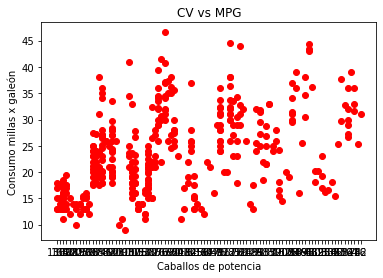

In [45]:
%matplotlib inline
data["mpg"] = data["mpg"].dropna()
data["horsepower"] = data["horsepower"].dropna()
plt.plot(data["horsepower"], data["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo millas x galeón")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a + b  auto

In [47]:
X= ((data["horsepower"].fillna(data["horsepower"].mean())).to_numpy()).reshape(-1, 1)
X1= ((data["horsepower"].fillna(data["horsepower"].mean())).to_numpy()).reshape(-1, 1)
Y= ((data["mpg"].fillna(data["mpg"].mean())).to_numpy()).reshape(-1, 1)

TypeError: Could not convert 13016515015014019822021522519017016015022595959785884687909511390215200210193889095?1001051008810016517515315018017017511072100888690707665696070958054908616517515015315020815516019097150130140150112768769869297808817515014513715019815015815021522517510510010088954615016717018010088729490851079014523049759111215011012218095?100100678065751001101051401501501401508367785261757575979367951057272170145150148110105110951101101297583100789671979770909588981155386819279831401501201521001058190526070531007811095717075721021508810812018014513015068805896701451101451301101051009818017019014978887589638367789711011048665270601101401391059585881009010585110120145165139140689597759510585971031251151337168115858890110130129138135155142125150716580807712571907070656990115115907660706590889090789075927565105654848676767?676213210088?72848492110845864606765626863656574?7575100748076116120110105888588888885849092?746868637088757067676711085921129684908652847982 to numeric

In [48]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [49]:
type(Y)

pandas.core.series.Series

Text(0.5, 1.0, 'CV vs MPG')

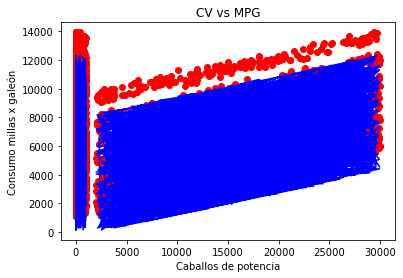

In [50]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X), color="blue")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo millas x galeón")
plt.title("CV vs MPG")

In [51]:
lm.score(X,Y)

0.9179923586131016

In [52]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean *100
SSD, RSE, y_mean, error

(1517733985.3408165, 801.7700624845577, 6163.176415976714, 13.009039631027608)

### Modelo de regresión cuadrático
* mpg = a + b * horspower^2

In [53]:
X = X**2

In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [56]:
lm.score(X,Y)

0.9851511391891157

In [57]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean *100
SSD, RSE, y_mean, error

(274811228.7481908, 341.16874933428056, 6163.176415976714, 5.535599280427437)

Text(0.5, 1.0, 'CV vs MPG')

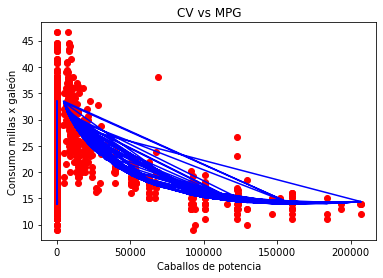

In [90]:
%matplotlib inline
plt.plot(np.sort(X),np.sort(Y), "ro")
plt.plot(np.sort(X), lm.predict(np.sort(X)), color="blue")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo millas x galeón")
plt.title("CV vs MPG")

### Modelo de regresión lineal y cuadrático
* mpg = a + b * horspower + c * horspower^2


In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [60]:
poly = PolynomialFeatures(degree=2)

In [61]:
X = poly.fit_transform(X1)

NameError: name 'X1' is not defined

In [62]:
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [63]:
lm.score(X,Y)

0.9851511391891157

In [64]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean *100
SSD, RSE, y_mean, error

(274811228.7481908, 341.16874933428056, 6163.176415976714, 5.535599280427437)

In [65]:
lm.coef_

array([ 4.41784019e-06,  1.04746781e-04,  3.13270094e+02, -1.05581656e+02,
       -1.72379464e+02,  7.89266651e+01])

In [66]:
lm.intercept_

1980.4735848244563

In [67]:
X.shape , X1.shape

NameError: name 'X1' is not defined

In [68]:
print(X)

      Monthly Income  Transaction Time  Gender_Male  City_Tier 2  City_Tier 3  \
0           53479969     393967.277401            0            0            0   
1          314956009      16104.769049            0            1            0   
2          521894025     762949.317692            1            1            0   
3          344176704     144566.813733            0            0            0   
4          208484721     162710.763620            0            1            0   
...              ...               ...          ...          ...          ...   
2357        32547025     211744.655154            1            1            0   
2358       125484804     725775.781366            1            1            0   
2359       455182225     189351.482415            0            0            1   
2360       372258436     433543.019739            0            0            0   
2361         8151025     314176.326018            1            0            0   

      Record  
0         25

mpg = 55.02619245 -0.43404318hp+ 0.00112615^2

In [69]:
%matplotlib inline
for d in range (2,3):
    poly = PolynomialFeatures(degree=d)
    X = poly.fit_transform(X1)
    lm = linear_model.LinearRegression()
    lm.fit(X,Y)
    print("Regresión de grado " +str(d))
    print("R2: " + str(lm.score(X,Y)))
    print("Cruce ordenadas: " +str(lm.intercept_))
    print("Coeficientes: " +str(lm.coef_))
    regresion_validation(X, Y, lm.predict(X))
    plt.plot(X1,Y, "ro")
    plt.plot(X1, lm.predict(X), color="blue")
    plt.xlabel("Caballos de potencia")
    plt.ylabel("Consumo millas x galeón")
    plt.title("CV vs MPG")

NameError: name 'X1' is not defined

In [70]:
def regresion_validation(X, Y, Y_pred):
    SSD = np.sum((Y-Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean *100
    print("SSD: " +str(SSD)+ "," + " RSE: "+str(RSE)+ "," +" Media: " + str(y_mean) + " Error: "+ str(error) +"%")
    print("")

# El problema de los outliers

Text(0.5, 1.0, 'Displacement vs MPG')

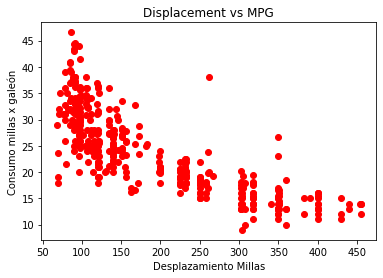

In [71]:
plt.plot(data["displacement"], data["mpg"], "ro")
plt.xlabel("Desplazamiento Millas")
plt.ylabel("Consumo millas x galeón")
plt.title("Displacement vs MPG")

In [72]:
lm = LinearRegression()

In [73]:
X= ((data["displacement"].fillna(data["displacement"].mean())).to_numpy()).reshape(-1, 1)
X1= ((data["displacement"].fillna(data["displacement"].mean())).to_numpy()).reshape(-1, 1)
Y= ((data["mpg"].fillna(data["mpg"].mean())).to_numpy()).reshape(-1, 1)

In [74]:
lm.fit(X,Y)

LinearRegression()

In [75]:
lm.score(X,Y)

0.646742183425786

In [76]:
data.head(259)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
254,20.2,6,200.0,85,2965,15.8,78,1,ford fairmont (auto)
255,25.1,4,140.0,88,2720,15.4,78,1,ford fairmont (man)
256,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
257,19.4,6,232.0,90,3210,17.2,78,1,amc concord


In [77]:
data[(data["displacement"]>250)&( data["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
251,20.2,8,302.0,139,3570,12.8,78,1,mercury monarch ghia
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado
300,23.9,8,260.0,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [78]:
data_clean = data.drop([258, 305, 307, 372, 395])

In [79]:
lm1 = LinearRegression()
X= ((data_clean["displacement"].fillna(data_clean["displacement"].mean())).to_numpy()).reshape(-1, 1)
X1= ((data_clean["displacement"].fillna(data_clean["displacement"].mean())).to_numpy()).reshape(-1, 1)
Y= ((data_clean["mpg"].fillna(data_clean["mpg"].mean())).to_numpy()).reshape(-1, 1)
lm1.fit(X,Y)
lm1.score(X,Y)

0.6463529785914854

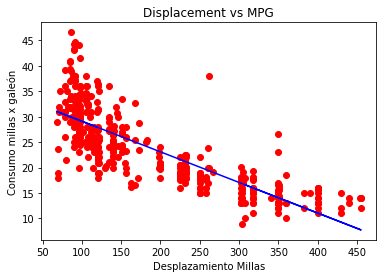

In [80]:
plt.plot(data_clean["displacement"], data_clean["mpg"], "ro")
plt.xlabel("Desplazamiento Millas")
plt.ylabel("Consumo millas x galeón")
plt.title("Displacement vs MPG")
plt.plot(X, lm1.predict(X), color = "blue")

Text(0.5, 1.0, 'CV vs MPG')

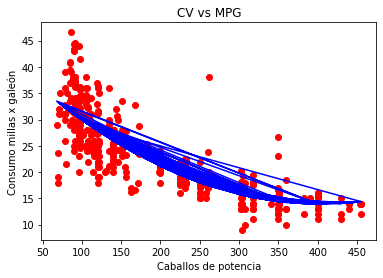

In [93]:
poly = PolynomialFeatures(degree=d)
X = poly.fit_transform(np.sort(X1))
lm = linear_model.LinearRegression()
lm.fit(X,Y)  
plt.plot(X1,Y, "ro")
plt.plot(np.sort(X1), lm.predict(X), color="blue")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo millas x galeón")
plt.title("CV vs MPG")

In [87]:
lm.get_params

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}